# Exploration for Milestone 03

Objective is to come up with the right focus questions for the research investigation of the Lernnavi Dataset.

In [141]:
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_loc = '../../data/'

## Data Loading
Data is stored under `../../data/raw`.

In [10]:
# Fetching the file names
datadir = data_loc + 'raw/'
files = [ f for f in os.listdir(datadir) if '.csv.gz' in f ]

print(f"Fetching in data directory {datadir}:")
_ = [print('\t- ' + f) for f in files]

Fetching in data directory ../../data/raw/:
	- challenge_transactions.csv.gz
	- documents.csv.gz
	- events.csv.gz
	- feedback.csv.gz
	- learn_sessions_transactions.csv.gz
	- topics_translated.csv.gz
	- topic_trees.csv.gz
	- transactions.csv.gz
	- users.csv.gz


In [11]:
# Loading all datasets
df = {}
for f in files:
    k = f.split('.')[0]
    df[k] = pd.read_csv(datadir + f)
    print(f"Loaded {k}")

Loaded challenge_transactions
Loaded documents
Loaded events
Loaded feedback
Loaded learn_sessions_transactions
Loaded topics_translated
Loaded topic_trees
Loaded transactions
Loaded users


## Initial exploration
 
Visualizing features, column types, distributions and values.

In [46]:
def describe_non_numerical(df, n_values=5):
    """
    Visualizing unique value counts and first 10 values for each non numerical column.
    """
    # Getting columns indexes of non numerical values
    nn_idx = []
    for i, t in enumerate(df.dtypes):
        if t == 'object': nn_idx.append(i)
    nn_idx = [df.columns[i] for i in nn_idx]
    
    # Printing statistics on values
    for c in nn_idx:
        uniques = df[c].unique().tolist()
        n_uniques = len(uniques)
        print(f'{c:15s} ({n_uniques:,} unique values): {uniques[:min(n_values, n_uniques)]}{"..." if n_uniques>n_values else ""}')
    
# describe_non_numerical(df['users'])

In [53]:
# Visualizing basic statistics for all tables

for k, _df in df.items():
    
    print(f"\n##################################################################################")
    print(f"###### Table: {k:20s} #############################################")
    
    display(_df.head(2))
    
    print('\nData types for each column:')
    display(_df.dtypes)    
    
    print('\nData statistics for numerical types:')
    display(_df.describe().T)
    
    print('\nData values for non numerical types:')
    describe_non_numerical(_df)



##################################################################################
###### Table: challenge_transactions #############################################


,challenge_id,name,transaction_id,document_id,ordering
0,1199,test,736203,4b9bVAve9pY9MzoqUxL9NP,1.0
1,1199,test,736203,6F04hpkYIud71cbgQfUnPT,2.0



Data types for each column:


challenge_id        int64
name               object
transaction_id      int64
document_id        object
ordering          float64
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
challenge_id,3283163.0,1.693075e+03,755.124959,133.0,1177.0,1973.0,2335.0,2823.0
transaction_id,3283163.0,1.046658e+06,350322.067830,400940.0,760010.0,1095663.0,1378673.0,1587308.0
ordering,3283148.0,1.721158e+01,15.921604,1.0,6.0,12.0,23.0,132.0



Data values for non numerical types:
name            (844 unique values): ['test', 'x', 'loading error', 'test does history have feedback', 'ALL_TASK_TYPES_V2']...
document_id     (3,177 unique values): ['4b9bVAve9pY9MzoqUxL9NP', '6F04hpkYIud71cbgQfUnPT', '619cAO04xRC5UnXlgcpZv7', '8rHKX9vttkZa80WecCmp1v', 'ad116OvKO2Z61vShLUNFYm']...

##################################################################################
###### Table: documents            #############################################


,version,document_id,title,type_id,created_time,author_id,content,status,version_comment,topic_id
0,128,0Ihkl0CyzoWSjDm5F,NaN,1,1531743989402,NaN,"{""id"": ""0Ihkl0CyzoWSjDm5F"", ""type"": ""MULTIPLE_...",WORK_IN_PROGRESS,NaN,3115
1,130,0Ihkl0CyzoWSjDm5F,Aufgabe PT 2.12,1,1531744162905,NaN,"{""id"": ""0Ihkl0CyzoWSjDm5F"", ""type"": ""MULTIPLE_...",WORK_IN_PROGRESS,NaN,3115



Data types for each column:


version              int64
document_id         object
title               object
type_id              int64
created_time         int64
author_id          float64
content             object
status              object
version_comment     object
topic_id             int64
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
version,40872.0,5.034287e+04,3.005967e+04,8.000000e+00,2.375075e+04,4.905450e+04,7.369625e+04,1.177230e+05
type_id,40872.0,9.804291e+00,7.936987e+00,1.000000e+00,2.000000e+00,9.000000e+00,1.600000e+01,2.800000e+01
created_time,40872.0,1.601569e+12,2.297858e+10,1.531728e+12,1.588593e+12,1.603045e+12,1.617108e+12,1.645455e+12
author_id,39061.0,2.981454e+03,3.413205e+03,2.000000e+00,3.600000e+01,1.050000e+02,6.543000e+03,1.600800e+04
topic_id,40872.0,1.546510e+03,9.751644e+02,1.000000e+00,9.800000e+02,1.026000e+03,2.063000e+03,4.256000e+03



Data values for non numerical types:
document_id     (5,125 unique values): ['0Ihkl0CyzoWSjDm5F', '12BcaxMyHyy5zgRp3J0OSE', '12YS7-8Ok0g9qhjqbP.6E5', '18hyTOAMA5lbvuKiNY07mb', '1AsbV7.ckM7bMY0w9AVX3F']...
title           (9,473 unique values): [nan, 'Aufgabe PT 2.12', '7.2E_TEXTREZ_MIKRO_ DEUT_?', '7.2E_TEXTREZ_MIKRO_ DEUT_11', 'alternative zu 7.8 (4.1_SATZGL_FUNKT)_4']...
content         (39,501 unique values): ['{"id": "0Ihkl0CyzoWSjDm5F", "type": "MULTIPLE_CHOICE", "hints": [], "title": "", "choices": [], "description": "", "documentType": "MULTIPLE_CHOICE", "solutionSteps": [], "multipleResponses": true}', '{"id": "0Ihkl0CyzoWSjDm5F", "type": "MULTIPLE_CHOICE", "hints": [], "title": "Aufgabe PT 2.12", "choices": [{"content": "<table cellpadding=\\"0\\" cellspacing=\\"0\\"><tbody><tr><td valign=\\"top\\"><p>a) Schriftsteller sind oft zu langsam, um Kriege richtig einzusch&auml;tzen.&nbsp;</p><p><br></p></td></tr></tbody></table>", "correct": false}, {"content": "<table cellpadding=

,event_id,user_id,timestamp,category,action,event_type,transaction_token,session_id,tracking_data
0,62,393211,1621583814885,TASK,VIEW_QUESTION,VIEW,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN
1,63,393211,1621583898912,TASK,SUBMIT_ANSWER,CLICK,7a10ca52-ffb5-4069-8800-0dc86d778e94,NaN,NaN



Data types for each column:


event_id               int64
user_id                int64
timestamp              int64
category              object
action                object
event_type            object
transaction_token     object
session_id           float64
tracking_data         object
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
event_id,3465559.0,1.771093e+06,1.011176e+06,6.200000e+01,8.995475e+05,1.773481e+06,2.647064e+06,3.518466e+06
user_id,3465559.0,3.965515e+05,3.870146e+03,3.876040e+05,3.945710e+05,3.961200e+05,3.994550e+05,4.046230e+05
timestamp,3465559.0,1.637762e+12,4.921346e+09,1.621584e+12,1.634566e+12,1.638027e+12,1.642077e+12,1.645520e+12
session_id,1306171.0,7.383719e+04,2.198120e+04,5.807000e+03,5.545700e+04,7.413200e+04,9.250500e+04,1.122590e+05



Data values for non numerical types:
category        (10 unique values): ['TASK', 'SESSION', 'HOME', 'DASHBOARD', 'GENERAL']...
action          (31 unique values): ['VIEW_QUESTION', 'SUBMIT_ANSWER', 'NEXT', 'GO_TO_THEORY', 'SKIP']...
event_type      (2 unique values): ['VIEW', 'CLICK']
transaction_token (637,678 unique values): ['7a10ca52-ffb5-4069-8800-0dc86d778e94', '88fdcaad-f73b-46a2-b561-d262f2441442', 'a75eb7b4-b2c2-47d4-9200-27980c175037', '46a3af7d-4451-4e1e-ada8-edf9a6d0c3b7', '61eb829d-bdda-4107-86af-ad9a14a7bdc9']...
tracking_data   (628,810 unique values): [nan, '{"trackingDataType": "SESSION_END_SCREEN_DATA", "sessionEndScreenTopics": [{"topic": {"id": 1005, "name": "Ungleichungen", "description": "Die Schülerinnen und Schüler können Ungleichungen (auch mit Hilfe der Linearfaktorzerlegung) lösen", "displayedOnDashboard": false}, "newMastery": 0.00020342697805520653, "masteryChange": -0.047222446199511575}]}', '{"trackingDataType": "SESSION_END_SCREEN_DATA", "sessionEndScr

,id,transaction_id,step_id,topic_id,topic_name,topic_description,group_id,group_description,group_correctness
0,37663,400412,15332,2669.0,Rechtschreibung anwenden,NaN,1470.0,"""Saite"" wurde früher auch mit ""e"" geschrieben....",WRONG
1,37664,400412,15329,2669.0,Rechtschreibung anwenden,NaN,1472.0,"Im Griechischen gibt es die Buchstaben ""rho"" u...",WRONG



Data types for each column:


id                     int64
transaction_id         int64
step_id                int64
topic_id             float64
topic_name            object
topic_description     object
group_id             float64
group_description     object
group_correctness     object
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
id,1651434.0,1.410862e+06,734874.844485,2593.0,821654.25,1382584.5,2029439.75,2733239.0
transaction_id,1651434.0,1.035849e+06,327490.198050,385779.0,800405.00,1059467.5,1309289.75,1587420.0
step_id,1651434.0,1.508534e+06,799395.405909,5461.0,969917.00,1487423.0,2052206.00,4483833.0
topic_id,1163594.0,2.474449e+03,750.444275,1.0,2055.00,2433.0,3174.00,4599.0
group_id,1163594.0,8.180359e+03,3825.347456,235.0,5246.00,7569.0,11650.00,15722.0



Data values for non numerical types:
topic_name      (427 unique values): ['Rechtschreibung anwenden', 'Superlative bilden', nan, 'Zahlenmengen', 'Rationale Zahlen erkennen']...
topic_description (164 unique values): [nan, 'Die Schülerinnen und Schüler kennen die Zahlenmengen und deren Symbole', 'Fehlertopic: Zahlen und Zahlenmengen > Zahlenmengen', 'Die Schülerinnen und Schüler können lineare Gleichungen mit Parameter lösen', 'Die Schülerinnen und Schüler können die Lösbarkeit von linearen Gleichungen bestimmen']...
group_description (3,170 unique values): ['"Saite" wurde früher auch mit "e" geschrieben. Dies wurde im 17. Jahrhundert aber geändert, um "Saite" von "Seite" zu unterscheiden.', 'Im Griechischen gibt es die Buchstaben "rho" und "theta", weswegen viele Fremdwörter aus dem Griechischen mit "rh" oder "th" geschrieben werden.', '"Strapazen" stammt dem italienischen Wort "strapazzare" ab und bedeutet "stark beanspruchen/abnutzen".', '"parallel" stammt dem griechischen Wort "al

,learn_session_id,transaction_id,topic_id,max_num_tasks,is_closed,type_id,is_accepted
0,6673,393831,3,5,1,1,1.0
1,6673,400408,3,5,1,1,1.0



Data types for each column:


learn_session_id      int64
transaction_id        int64
topic_id              int64
max_num_tasks         int64
is_closed             int64
type_id               int64
is_accepted         float64
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
learn_session_id,502921.0,60981.447261,29666.135201,5271.0,36707.0,61195.0,86511.0,112277.0
transaction_id,502921.0,982283.820781,331298.851716,385713.0,724507.0,967076.0,1250210.0,1587430.0
topic_id,502921.0,1918.586142,1081.946106,3.0,978.0,2055.0,3111.0,4097.0
max_num_tasks,502921.0,5.000000,0.000000,5.0,5.0,5.0,5.0,5.0
is_closed,502921.0,0.956267,0.204500,0.0,1.0,1.0,1.0,1.0
type_id,502921.0,1.395967,0.489058,1.0,1.0,1.0,2.0,2.0
is_accepted,414388.0,0.972429,0.163740,0.0,1.0,1.0,1.0,1.0



Data values for non numerical types:

##################################################################################
###### Table: topics_translated    #############################################


,id,name,description,name_english,description_english,math
0,1,Deutsch,Sprache als System,German,Language as a system,0.0
1,2,Orthografie,NaN,spelling,NaN,0.0



Data types for each column:


id                       int64
name                    object
description             object
name_english            object
description_english     object
math                   float64
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
id,557.0,2609.479354,962.151625,1.0,2053.0,2978.0,3249.0,4502.0
math,555.0,0.536937,0.499084,0.0,0.0,1.0,1.0,1.0



Data values for non numerical types:
name            (527 unique values): ['Deutsch', 'Orthografie', 'Rechtschreibprinzipien', 'Mathematik', 'Zahlen und Zahlenmengen']...
description     (183 unique values): ['Sprache als System', nan, 'Rechnen und so...', 'Die Schülerinnen und Schüler kennen die Zahlenmengen und deren Symbole', 'Die Schülerinnen und Schüler können Grundrechenarten in den rationalen Zahlen ausführen']...
name_english    (525 unique values): ['German', 'spelling', 'Spelling principles', 'mathematics', 'Numbers and number quantities']...
description_english (183 unique values): ['Language as a system', nan, 'Expect and so ...', 'The students know the number of numbers and their symbols', 'The students can perform basic work in the rational numbers']...

##################################################################################
###### Table: topic_trees          #############################################


,id,parent_id,child_id,sibling_rank,displayed_on_dashboard
0,1059,NaN,1,1,1
1,1060,NaN,109,109,1



Data types for each column:


id                          int64
parent_id                 float64
child_id                    int64
sibling_rank                int64
displayed_on_dashboard      int64
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
id,536.0,2005.628731,884.369385,1059.0,1264.75,1703.5,2421.75,4886.0
parent_id,533.0,2031.273921,1107.433798,1.0,997.00,2027.0,3116.00,4256.0
child_id,536.0,2610.162313,982.834977,1.0,2051.50,2985.5,3273.25,4599.0
sibling_rank,536.0,198.697761,316.039637,0.0,1.00,4.0,317.25,903.0
displayed_on_dashboard,536.0,0.305970,0.461248,0.0,0.00,0.0,1.00,1.0



Data values for non numerical types:

##################################################################################
###### Table: transactions         #############################################


,transaction_id,transaction_token,user_id,document_id,document_version,evaluation,input,start_time,commit_time,user_agent,validation,solution,type
0,1061991,cf99b0d7-279a-4ae0-8ef3-a15514e350b6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637146446763,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN
1,1066631,13e3086b-1c4e-4d28-87a3-0582ccf495c6,387604.0,111K3PY6sbr8ac1mRGpse1,87668,NaN,NaN,1637233737283,NaN,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,NaN,NaN,NaN



Data types for each column:


transaction_id         int64
transaction_token     object
user_id              float64
document_id           object
document_version       int64
evaluation            object
input                 object
start_time             int64
commit_time          float64
user_agent            object
validation            object
solution              object
type                  object
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
transaction_id,800018.0,1.000660e+06,3.326323e+05,3.858830e+05,7.551122e+05,9.922390e+05,1.292519e+06,1.587430e+06
user_id,800018.0,3.951467e+05,4.296577e+03,3.876040e+05,3.917400e+05,3.949160e+05,3.981410e+05,4.046040e+05
document_version,800018.0,8.096981e+04,2.061845e+04,4.870000e+02,6.703800e+04,8.752700e+04,9.401500e+04,1.176590e+05
start_time,800018.0,1.632356e+12,1.101465e+10,1.602923e+12,1.629442e+12,1.636100e+12,1.641214e+12,1.645520e+12
commit_time,567830.0,1.632047e+12,1.116324e+10,1.602923e+12,1.624615e+12,1.635929e+12,1.641221e+12,1.645520e+12



Data values for non numerical types:
transaction_token (800,018 unique values): ['cf99b0d7-279a-4ae0-8ef3-a15514e350b6', '13e3086b-1c4e-4d28-87a3-0582ccf495c6', '6f292166-86bd-4ec9-81e8-22e9033d571e', '79a7d731-a36b-4529-a11b-108b9f877a04', 'a45b6464-371e-47f4-842c-34f9e345b4ec']...
document_id     (4,419 unique values): ['111K3PY6sbr8ac1mRGpse1', '153kgQ6uVpd7YKFVnDhbat', '18FedrGurdA7jklbk0mtVA', '1aRVNzqunJs6eJCo9vZiy3', '1b5ragmTqNI84AScVCk3GQ']...
evaluation      (4 unique values): [nan, 'CORRECT', 'PARTIAL', 'WRONG']
input           (100,126 unique values): [nan, '{"type": "MULTIPLE_CHOICE", "selections": {"0": true, "1": false, "2": false}}', '{"type": "MULTIPLE_CHOICE", "selections": {"1": true, "3": false}}', '{"type": "CLOZE_TEXT_DROPDOWN", "clozeInputs": ["grünes", "Rot"]}', '{"type": "CLOZE_TEXT_DROPDOWN", "clozeInputs": ["grünes", "CLOZE_NO_SELECTION"]}']...
user_agent      (1,114 unique values): ['Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like 

,user_id,gender,canton,class_level,class_code
0,387593,MALE,ZH,andere,NaN
1,387594,MALE,ZH,Langzeitgymnasium - 1. Jahr,NaN



Data types for each column:


user_id         int64
gender         object
canton         object
class_level    object
class_code     object
dtype: object


Data statistics for numerical types:


,count,mean,std,min,25%,50%,75%,max
user_id,13790.0,395910.594561,4820.039987,387593.0,391775.25,395884.5,400006.75,404623.0



Data values for non numerical types:
gender          (4 unique values): ['MALE', 'FEMALE', nan, 'STAR']
canton          (14 unique values): ['ZH', 'Andere', nan, 'SG', 'AG']...
class_level     (65 unique values): ['andere', 'Langzeitgymnasium - 1. Jahr', 'Keine Angabe', nan, 'Gymnasium - 3. Jahr']...
class_code      (18 unique values): [nan, '9Q2M7', 'FTC4E', 'CBGY6', 'DMBNK']...


## Deep dive


### Challenges

In [91]:
challenges = df['challenge_transactions']
transactions = df['transactions']

NAs (do not have start times): 930061 (28.33%)


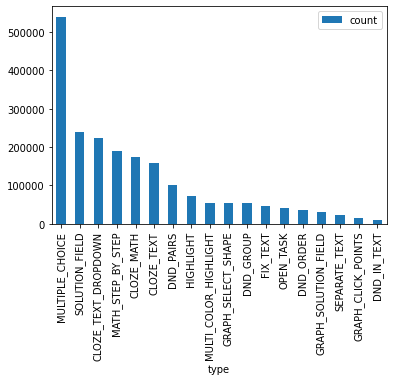

In [104]:
# Adding infos to challenges
tmp = challenges.merge(transactions[['transaction_id', 'start_time', 'evaluation', 'type']], how='left', on='transaction_id')
tmp_nas = tmp.start_time.isna().value_counts()
print(f"NAs (do not have start times): {tmp_nas.iloc[1]} ({tmp_nas.iloc[1] / tmp.shape[0]*100:.2f}%)")

# Checking info of challenges
tmp2 = tmp.groupby('type').count()['name'].sort_values(ascending=False).reset_index().rename(columns={'name':'count'})
tmp2.plot(x='type', y='count', kind='bar')
plt.show()

All challenges appear once in time: False (#challenges 790, #time dependent challenges 2051)
Challenges get repeated over time (appear more than 1 day).


<Figure size 1224x216 with 0 Axes>

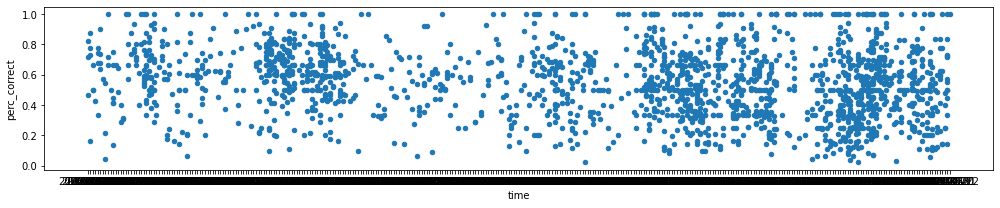

In [130]:
## Challenges temporal visualization
tmp = tmp.loc[~tmp.start_time.isna() & ~tmp.evaluation.isna()]
tmp['time'] = pd.to_datetime(tmp.start_time, unit='ms').dt.strftime("%Y-%m-%d")

# Checking if one challenge id per time
nuniques_ids = tmp.challenge_id.nunique() 
ids_time_groups = tmp.groupby(['time', 'challenge_id'])
nunique_ids_time = ids_time_groups.first().reset_index().shape[0]
print(f"All challenges appear once in time: {nuniques_ids==nunique_ids_time} (#challenges {nuniques_ids}, #time dependent challenges {nunique_ids_time})")
print("Challenges get repeated over time (appear more than 1 day).")

tot = ids_time_groups.count()['name']
correct = tmp.loc[tmp.evaluation=='CORRECT'].groupby(['time', 'challenge_id']).count()['name']
tmp2 = (correct / tot).reset_index().rename(columns={'name' : 'perc_correct'})

plt.figure(figsize=(17,3))
tmp2.plot(x='time', y='perc_correct', kind = 'scatter', figsize=(17, 3))
plt.show()

In [ ]:
users= df[]

### Users Validation

<AxesSubplot:xlabel='time', ylabel='user_id'>

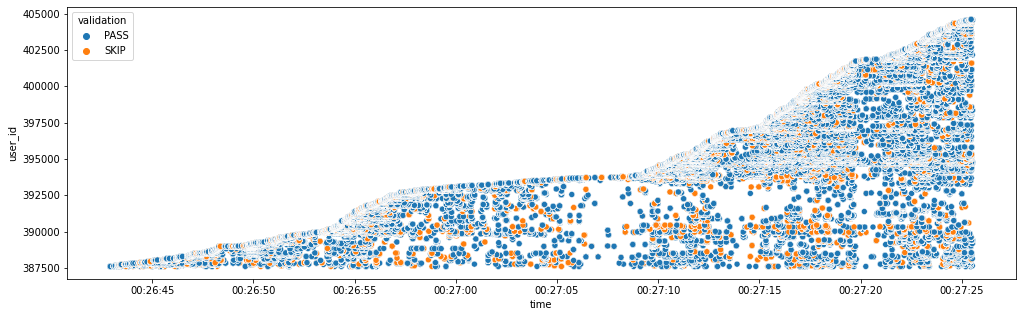

In [150]:
transactions['time'] = pd.to_datetime(transactions.start_time)
tmp = transactions.loc[~transactions.validation.isna()]

plt.figure(figsize=(17, 5))
sns.scatterplot(data=tmp, x='time', y='user_id', hue='validation')

<AxesSubplot:xlabel='time', ylabel='user_id'>

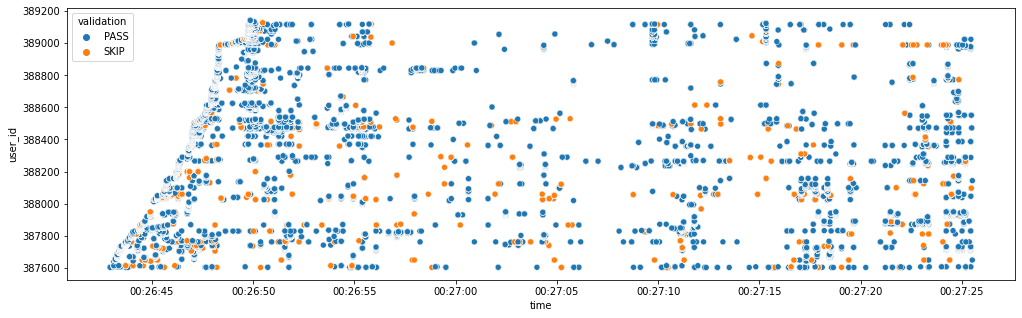

In [149]:
subset_users = tmp.user_id.unique()[:1000]

tmp3 = tmp.loc[tmp.user_id.isin(subset_users)]
plt.figure(figsize=(17, 5))
sns.scatterplot(data=tmp3, x='time', y='user_id', hue='validation')

challenge_transactions 
 Index(['challenge_id', 'name', 'transaction_id', 'document_id', 'ordering'], dtype='object') 

documents 
 Index(['version', 'document_id', 'title', 'type_id', 'created_time',
       'author_id', 'content', 'status', 'version_comment', 'topic_id'],
      dtype='object') 

events 
 Index(['event_id', 'user_id', 'timestamp', 'category', 'action', 'event_type',
       'transaction_token', 'session_id', 'tracking_data'],
      dtype='object') 

feedback 
 Index(['id', 'transaction_id', 'step_id', 'topic_id', 'topic_name',
       'topic_description', 'group_id', 'group_description',
       'group_correctness'],
      dtype='object') 

learn_sessions_transactions 
 Index(['learn_session_id', 'transaction_id', 'topic_id', 'max_num_tasks',
       'is_closed', 'type_id', 'is_accepted'],
      dtype='object') 

topics_translated 
 Index(['id', 'name', 'description', 'name_english', 'description_english',
       'math'],
      dtype='object') 

topic_trees 
 Index(['id', 

[None, None, None, None, None, None, None, None, None]

<AxesSubplot:xlabel='index'>

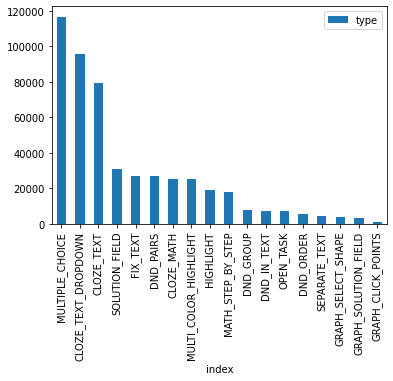

In [159]:
events = df['events'] 
transactions.type.value_counts().reset_index().plot(x='index', y='type', kind='bar')

## statsmodels regression test

In [2]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [3]:
# smf.ols(formula = "column ~ column2 + column2", data=data)